In [2]:
import torch
import torchsummary
from torchsummary import summary
from torchvision import models

import copy
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
import os
import yaml
import json

# from utils.helper_functions import *

import pylab
# pylab.rc('font', family='serif', size=14)

import socket
if socket.gethostname()[0:4] in  ['node','holm','wats']:
    path_prefix = '/rigel/issa/users/Tahereh/Research'
elif socket.gethostname() == 'SYNPAI':
    path_prefix = '/hdd6gig/Documents/Research'
elif socket.gethostname()[0:2] == 'ax':
    path_prefix = '/home/tt2684/Research'

resultsdir = path_prefix + '/Results/Symbio/Symbio/'

savefigsdir = path_prefix + '/Results/FFA_Symbio2023'

selected_config_keys = ['archd', 'arche','batch_size','patienced', 'patiencee','wdB', 
                        'wdF' ,'optimizerB', 'optimizerF','dataset',
'lrB', 'lrF', 'momentumB', 'momentumF','base_channels','epochs','runname']

In [4]:
# from utils.helper_functions import *

figsavedir = '/home/tt2684/Research/Results/FFA_Symbio2023/Figures/Fig2_Trainingresults/'


In [5]:
alpha = 0.4
colors = {'FA':'mediumseagreen', 'BP':'k', 'SLVanilla':'indianred'}
method_labels = {'FA':'FA', 'BP':'BP', 'SLVanilla':'FFA'}
linestyles = {'FA':'-', 'BP':'-', 'SLVanilla':'-'}

# Figure 2 (training)

### training (for MNIST and CIFAR10)

number of valid runs discriminative 5
number of valid runs autoencoder 5
method SLVanilla 0.883
method BP 0.012
method FA 0.01
method SLVanilla 76.472
method BP 88.532
method FA 71.565
asymresnet18_893 PatienceF: 50.0 PatienceB: 40


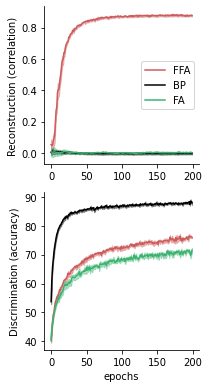

In [65]:
# MNIST
# hashname = 'RMSpRMSpMNISTAsymResLNet10BNaffine2'
# n_epochs = 150
# n_epochs_ae = 150

#CIFAR10
hashname = 'asymresnet18_893'
n_epochs = 200
n_epochs_ae = 200

fig, axes = plt.subplots(2,1, figsize=[3,5.5])

test_acc_dict, test_corrd_dict, test_lossd_dict, configs, valid_runnames = get_measure_dicts_json(hashname, n_epochs, path_prefix, resultsdir)
test_acc_dict_ae, test_corrd_dict_ae, test_lossd_dict_ae, configs, valid_runnames_ae = get_measure_dicts_ae_json(hashname, n_epochs_ae, path_prefix, resultsdir)

arch =  configs['arche'][:-1]

methods = ['SLVanilla', 'BP','FA']



# Test correlation
ax = axes[0]
for method in methods:
    # plot discriminative
    measure = test_corrd_dict
    ax.plot(range(n_epochs ), np.median(measure[method], 0), colors[method], label=method_labels[method], ls=linestyles[method])
    ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
                    np.median(measure[method], 0)+measure[method].std(0),
                    alpha=alpha, color=colors[method], ls=linestyles[method])
    print('method',method, max(np.median(measure[method],0)))
    
#     if method in ['FA','BP']:
#         # plot autoencoders
#         measure = test_corrd_dict_ae
#         ax.plot(range(n_epochs_ae ), np.median(measure[method], 0), 'lightgray', label=method_labels[method] + ' AE', ls=linestyles[method])
#         ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
#                         np.median(measure[method], 0)+measure[method].std(0),
#                         alpha=alpha, color='gray', ls=linestyles[method])
#         print('autoencoder corr',method, max(np.median(measure[method],0)))
        
    
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',direction='out', right=False)
plt.tick_params(axis='x',direction='out', top=False)
# ax.set_xlabel('epochs')
ax.set_ylabel('Reconstruction (correlation)')
ax.legend(loc='center right')

# ax.set_title('%s %s (%s)'%(configs['dataset'], arch, hashname))
# plt.tight_layout()

savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.png'%(hashname), dpi=200)
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.pdf'%(hashname), dpi=200)


# ax.set_title('Convolutional architecture on %s'%configs['dataset'])



savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.png'%(hashname), dpi=200)
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.pdf'%(hashname), dpi=200)

# Test Acc
ax = axes[1]

for method in methods:
    # plot discriminative
    measure = test_acc_dict
    ax.plot(range(n_epochs ), np.median(measure[method], 0), colors[method], label=method_labels[method], ls=linestyles[method])
    ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
                    np.median(measure[method], 0)+measure[method].std(0),
                    alpha=alpha, color=colors[method], ls=linestyles[method])
    print('method',method, max(np.median(measure[method],0)))
    
#     if method in ['FA','BP']:
#         # plot autoencoders
#         measure = test_acc_dict_ae
#         ax.plot(range(n_epochs_ae ), np.median(measure[method], 0), 'lightgray', label=method_labels[method] + ' AE', ls=linestyles[method])
#         ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
#                         np.median(measure[method], 0)+measure[method].std(0),
#                         alpha=alpha, color='gray', ls=linestyles[method])
#         print('autoencoder acc',method, max(np.median(measure[method],0)))
        
    
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',direction='out', right=False)
plt.tick_params(axis='x',direction='out', top=False)
ax.set_xlabel('epochs')
ax.set_ylabel('Discrimination (accuracy)')
# ax.legend(loc='center right')

# ax.set_title('%s %s (%s)'%(configs['dataset'], arch, hashname))

savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)

# fig.savefig(savedir + '5lineplots_Testacc_%s.png'%(hashname), dpi=200)
# fig.savefig(savedir + '5lineplots_Testacc_%s.pdf'%(hashname), dpi=200)


# ax.set_title('Convolutional architecture on %s'%configs['dataset'])


savedir = path_prefix + '/Results/Symbio/runswithhash/Final/'
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
# fig.savefig(savedir + '5lineplots_Testacc_%s.png'%(hashname), dpi=200)
# fig.savefig(savedir + '5lineplots_Testacc_%s.pdf'%(hashname), dpi=200)
#-------------------------------------------------------------------------------
print(hashname, 'PatienceF:',configs['patiencee'],'PatienceB:',configs['patienced'])

plt.tight_layout()
fig.savefig(figsavedir + 'Testacc_corr_%s.png'%(hashname), dpi=200)
fig.savefig(figsavedir+ 'Testacc_corr_%s.pdf'%(hashname), dpi=200)


## Fig 2 supplementary

number of valid runs discriminative 5
number of valid runs autoencoder 5
method SLVanilla 0.883
method BP 0.012
autoencoder corr BP 0.987
method FA 0.01
autoencoder corr FA 0.941
method SLVanilla 76.472
method BP 88.532
autoencoder acc BP 35.938
method FA 71.565
autoencoder acc FA 26.953
method SLVanilla 4.214134277441563
method BP 8.972415337195763
autoencoder loss BP 0.987
method FA 7.736478304251646
autoencoder loss FA 0.941
asymresnet18_893 PatienceF: 50.0 PatienceB: 40


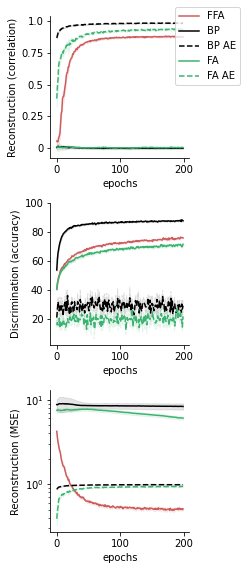

In [90]:
#MNIST
# hashname = 'RMSpRMSpMNISTAsymResLNet10BNaffine2'
# n_epochs = 150
# n_epochs_ae = 150
# legennd_on = False

#CIFAR10
hashname = 'asymresnet18_893' 
n_epochs = 200
n_epochs_ae = 200
legennd_on = True


fig, axes = plt.subplots(3,1, figsize=[4,8])

test_acc_dict, test_corrd_dict, test_lossd_dict, configs, valid_runnames = get_measure_dicts_json(hashname, n_epochs, path_prefix, resultsdir)
test_acc_dict_ae, test_corrd_dict_ae, test_lossd_dict_ae, configs, valid_runnames_ae = get_measure_dicts_ae_json(hashname, n_epochs_ae, path_prefix, resultsdir)

arch =  configs['arche'][:-1]

methods = ['SLVanilla', 'BP','FA']
# colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
# method_labels = {'FA':'FA', 'BP':'BP', 'SLVanilla':'SL'}
# linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-'}



# Test correlation
ax = axes[0]
for method in methods:
    # plot discriminative
    measure = test_corrd_dict
    ax.plot(range(n_epochs ), np.median(measure[method], 0), colors[method], label=method_labels[method], ls=linestyles[method])
    ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
                    np.median(measure[method], 0)+measure[method].std(0),
                    alpha=0.1, color=colors[method], ls=linestyles[method])
    print('method',method, max(np.median(measure[method],0)))
    
    if method in ['FA','BP']:
        # plot autoencoders
        measure = test_corrd_dict_ae
        ax.plot(range(n_epochs_ae ), np.median(measure[method], 0), colors[method],
                label=method_labels[method] + ' AE', ls='--')
        ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
                        np.median(measure[method], 0)+measure[method].std(0),
                        alpha=0.1, color=colors[method])
        print('autoencoder corr',method, max(np.median(measure[method],0)))
        
    
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',direction='out', right=False)
plt.tick_params(axis='x',direction='out', top=False)
ax.set_xlabel('epochs')
ax.set_ylabel('Reconstruction (correlation)')
if legennd_on:
    ax.legend(loc='upper right', bbox_to_anchor=(1.4,1.1))
    
ax.set_yticks([0, 0.25, 0.5, 0.75,1.])
ax.set_yticklabels([0, 0.25, 0.5, 0.75,1.])



savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)
    



savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.png'%(hashname), dpi=200)
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.pdf'%(hashname), dpi=200)



# Test Acc
ax = axes[1]

for method in methods:
    # plot discriminative
    measure = test_acc_dict
    ax.plot(range(n_epochs ), np.median(measure[method], 0), colors[method], label=method_labels[method], ls=linestyles[method])
    ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
                    np.median(measure[method], 0)+measure[method].std(0),
                    alpha=0.1, color=colors[method], ls=linestyles[method])
    print('method',method, max(np.median(measure[method],0)))
    
    if method in ['FA','BP']:
        # plot autoencoders
        measure = test_acc_dict_ae
        ax.plot(range(n_epochs_ae ), np.median(measure[method], 0), colors[method], 
                label=method_labels[method] + ' AE', ls='--')
        ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
                        np.median(measure[method], 0)+measure[method].std(0),
                        alpha=0.1, color=colors[method], ls='--')
        print('autoencoder acc',method, max(np.median(measure[method],0)))
        
    
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y',direction='out', right=False)
ax.tick_params(axis='x',direction='out', top=False)
ax.set_xlabel('epochs')
ax.set_ylabel('Discrimination (accuracy)')

if 'MNIST' in hashname:
    ax.set_yticks([70,80,90,100])
    ax.set_yticklabels([70,80,90,100])
else:
    ax.set_yticks([20,40,60,80,100])
    ax.set_yticklabels([20,40,60,80,100])


savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)




savedir = path_prefix + '/Results/Symbio/runswithhash/Final/'
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
# fig.savefig(savedir + '5lineplots_Testacc_%s.png'%(hashname), dpi=200)
# fig.savefig(savedir + '5lineplots_Testacc_%s.pdf'%(hashname), dpi=200)
#-------------------------------------------------------------------------------

# Test Loss
ax = axes[2]
for method in methods:
    # plot discriminative
    measure = test_lossd_dict
    ax.plot(range(n_epochs ), np.median(measure[method], 0), colors[method], label=method_labels[method], ls=linestyles[method])
    ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
                    np.median(measure[method], 0)+measure[method].std(0),
                    alpha=0.1, color=colors[method], ls=linestyles[method])
    print('method',method, max(np.median(measure[method],0)))
    
    if method in ['FA','BP']:
        # plot autoencoders
        measure = test_corrd_dict_ae
        ax.semilogy(range(n_epochs_ae ), np.median(measure[method], 0), colors[method],
                label=method_labels[method] + ' AE', ls='--')
        ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
                        np.median(measure[method], 0)+measure[method].std(0),
                        alpha=0.1, color=colors[method])
        print('autoencoder loss',method, max(np.median(measure[method],0)))
        
    
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',direction='out', right=False)
plt.tick_params(axis='x',direction='out', top=False)
ax.set_xlabel('epochs')
ax.set_ylabel('Reconstruction (MSE)')
# ax.legend(loc='center right')

# ax.set_title('%s %s (%s)'%(configs['dataset'], arch, hashname))
# plt.tight_layout()

savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.png'%(hashname), dpi=200)
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.pdf'%(hashname), dpi=200)


# ax.set_title('Convolutional architecture on %s'%configs['dataset'])



savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.png'%(hashname), dpi=200)
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.pdf'%(hashname), dpi=200)

print(hashname, 'PatienceF:',configs['patiencee'],'PatienceB:',configs['patienced'])

plt.tight_layout()
fig.savefig(figsavedir + 'Supp_Testacc_withAEs_corr_MSE_%s.png'%(hashname), dpi=200)
fig.savefig(figsavedir+ 'Supp_Testacc_withAEs_corr_MSE_%s.pdf'%(hashname), dpi=200)


## Fig2 scatter plots

number of valid runs discriminative 5
number of valid runs autoencoder 5
customized
AsymResNetL10Simple
number of valid runs discriminative 5
number of valid runs autoencoder 5
resnet18
asymresnet18_893


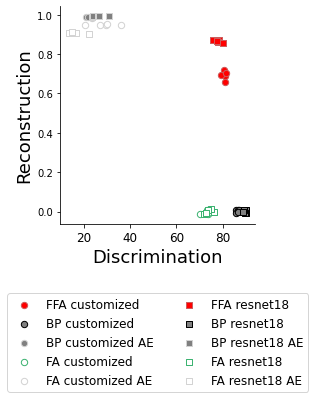

In [134]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

markers = {'customized':'o', 'resnet18':'s'}

hash_1 = 'AsymResNetL10Simple'
hash_2  = 'asymresnet18_893'



fig, ax = plt.subplots(figsize=(3.5,4))
ax = plt.subplot(111)


for arch_type in ['customized', 'resnet18']:
    facecolors = {'FA':'white', 'BP':'gray', 'SLVanilla':'red'}
    linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-'}

    methods = ['SLVanilla', 'BP','FA']
    #'RMSpropRMSpropMNISTAsymResLNet10' #'RMSpropRMSpropMNISTFullyConn' ##'RMSpropRMSpropMNISTFullyConnE150'
        # 'RMSpRMSpMNISTAsymResLNet10BNaffine'
    if arch_type =='customized':
        hash_arch_type = hash_1
        n_epochs, n_epochs_ae = 400, 400
        arch_label = 'customized'
    elif arch_type == 'resnet18':
        hash_arch_type = hash_2 
        n_epochs, n_epochs_ae = 400, 400
        arch_label = 'resnet18'
    test_acc_dict, test_corrd_dict, test_lossd_dict, configs, _ = get_measure_dicts_json(hash_arch_type, n_epochs, path_prefix, resultsdir)
    test_acc_dict_ae, test_corrd_dict_ae, test_lossd_dict_ae, _, _ = get_measure_dicts_ae_json(hash_arch_type, n_epochs_ae, path_prefix, resultsdir)


#     fig, ax = plt.subplots(1,1, figsize=(5,5))

    for method in methods:
               
#         x = 100-test_acc_dict[method][:,-1] #.max(1)#
        x = test_acc_dict[method][:,-1] #.max(1)#
        y = test_corrd_dict[method][:,-1] #.max(1)
        ax.scatter(x, y, s=40, edgecolor=colors[method],facecolor=facecolors[method],
                   marker=markers[arch_type], label='%s %s'%(method_labels[method],arch_label))
#         confidence_ellipse(x, y, ax, edgecolor=colors[method], ls=linestyles[method])


        if method !='SLVanilla':


            y = test_corrd_dict_ae[method][:,-1] #.max(1)#
#             x = 100-test_acc_dict_ae[method][:,-1]#.max(1)
            x = test_acc_dict_ae[method][:,-1]#.max(1)


            ax.scatter(x, y, s=40, edgecolor='lightgray', facecolor=facecolors[method],
                       marker=markers[arch_type], label='%s %s'%(method_labels[method],arch_label) + ' AE')
#             confidence_ellipse(x, y, ax, edgecolor='lightgray', ls=linestyles[method])




    ax = plt.gca()
    ax.patch.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tick_params(axis='y',direction='out', right=False)
    plt.tick_params(axis='x',direction='out', top=False)
    ax.set_xlabel('Discrimination', fontsize=18)
    ax.set_ylabel('Reconstruction', fontsize=18)
   


    
    print(arch_type)
    print(hash_arch_type)

lgnd = ax.legend(loc='lower center',bbox_to_anchor=(0.5, -0.8),ncol=2,fontsize=12 )#labelspacing=0.05
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)


savedir = path_prefix + '/Results/Symbio/summary/'
if not os.path.exists(savedir):
    os.makedirs(savedir)

# plt.tight_layout()
fig.savefig(figsavedir + 'ScatterTestacc_corr_%s.png'%(hashname), dpi=200,bbox_extra_artists=(lgnd,),
            bbox_inches='tight')
fig.savefig(figsavedir+ 'ScatterTestacc_corr_%s.pdf'%(hashname), dpi=200,bbox_extra_artists=(lgnd,),
            bbox_inches='tight')

## Alignment


84.463 Oct20-11-27_CIFAR10_feb1487c9e_hypersearchsimplemodules_720
96.082 Mar01-11-04_CIFAR10_1f4065b782_868
100.0 Oct02-21-29_MNIST_e6507d0d57_RMSpropRMSpropMNISTFullyConnE150_955
98.655 Oct06-10-50_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine_879
85.407 Oct20-11-27_CIFAR10_feb1487c9e_hypersearchsimplemodules_980
94.193 Oct22-15-24_CIFAR10_4623412840_hypsaymresnet18mtm_917
95.707 Nov04-09-06_CIFAR10_d0236dbe9e_hypAsymResNetL10Simple_924
95.343 Oct20-11-28_CIFAR10_feb1487c9e_hypersearchsimplemodules_1022
100.0 Oct28-14-51_MNIST_4d91649eea_TwoCostAEcontrolMNISTCorrSchedul_422
85.667 Oct20-11-28_CIFAR10_feb1487c9e_hypersearchsimplemodules_3
100.0 Oct02-18-26_MNIST_5d710fa125_RMSpropRMSpropMNISTFullyConn_557
95.387 Nov24-09-29_CIFAR10_9106b0f90e_476
77.987 Oct20-11-27_CIFAR10_feb1487c9e_hypersearchsimplemodules_473
95.423 Oct20-11-27_CIFAR10_feb1487c9e_hypersearchsimplemodules_770
93.574 Mar04-09-26_2021_CIFAR10_1f4065b782_648
98.85 Oct06-10-50_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymRes

/home/tt2684/.conda/envs/ax11env/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


100.0 Oct02-18-25_MNIST_5d710fa125_RMSpropRMSpropMNISTFullyConn_456
100.0 Oct02-18-26_MNIST_5d710fa125_RMSpropRMSpropMNISTFullyConn_339
93.293 Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_893
100.0 Oct29-21-17_MNIST_4d91649eea_TwoCostAEcontrolMNISTCorrSchedulBHModu_125


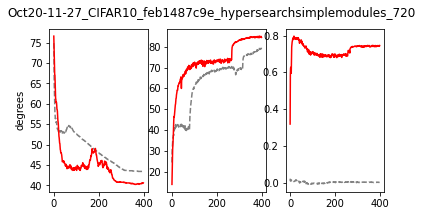

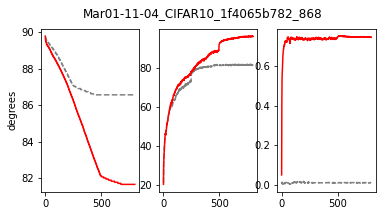

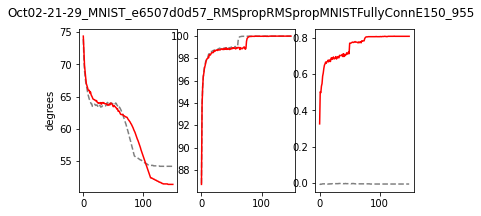

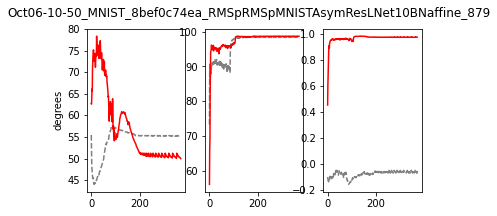

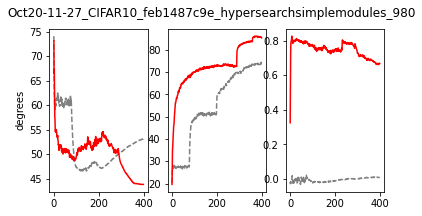

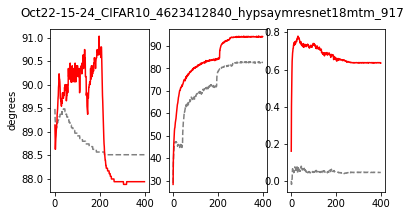

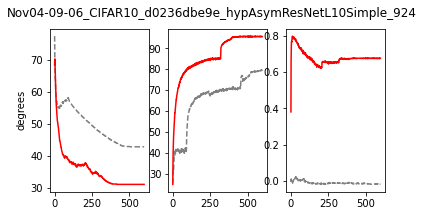

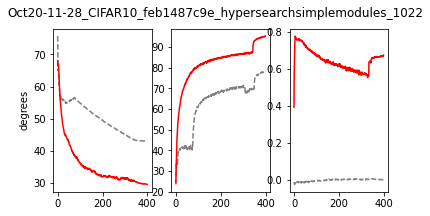

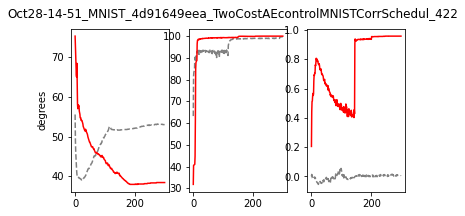

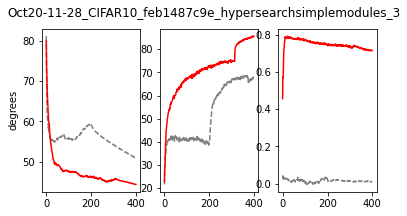

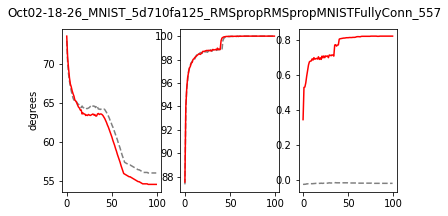

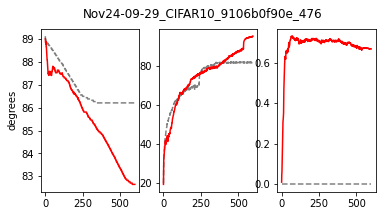

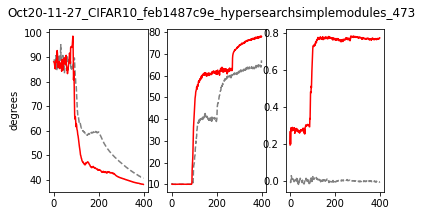

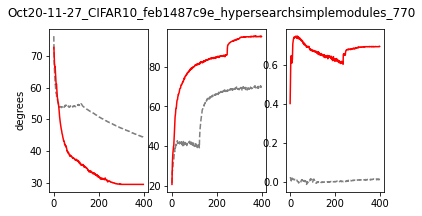

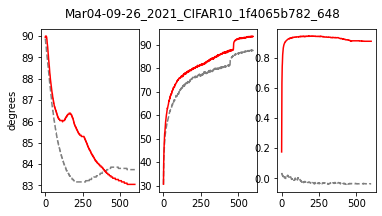

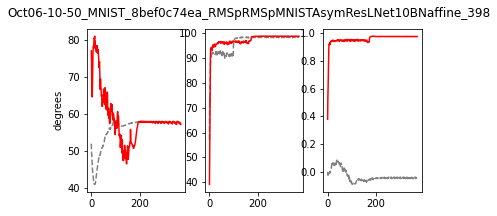

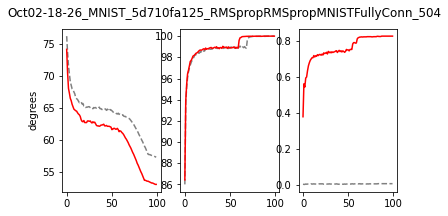

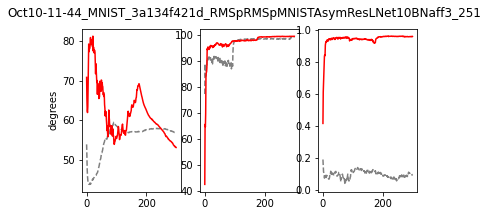

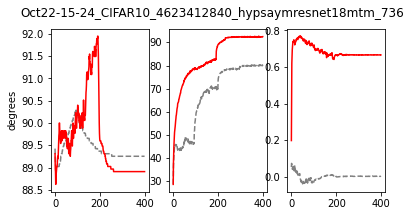

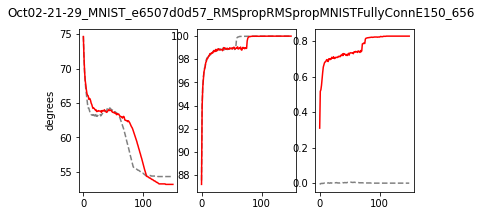

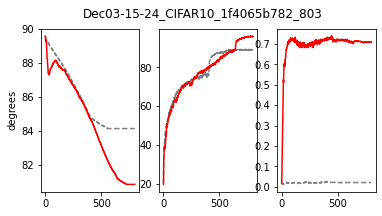

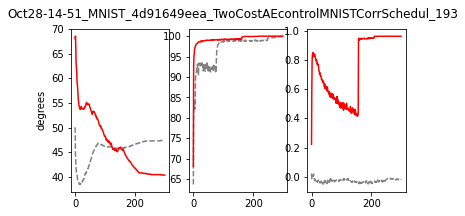

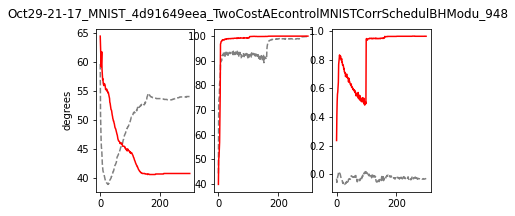

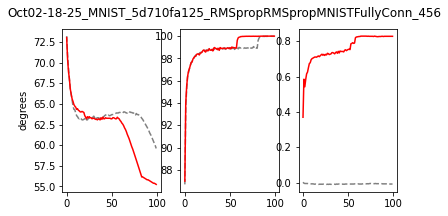

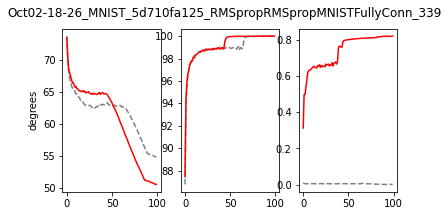

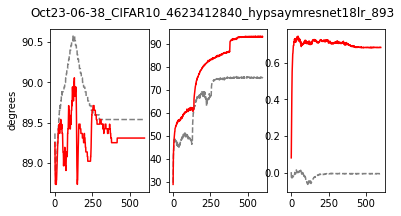

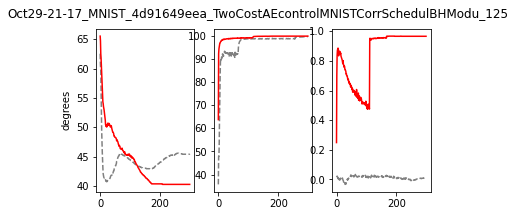

In [42]:
# path_alignment_ = '/home/tt2684/Research/Results/Symbio/Symbio/Oct07-11-37_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine2_76/run_json_dict_SLVanilla.json'
import json

path_resultsdir = '/home/tt2684/Research/Results/Symbio/Symbio/'
list_runs = os.listdir(path_resultsdir)

for l in list_runs:
    path_alignment_FA = os.path.join(path_resultsdir, l,'run_json_dict_FA.json')
    path_alignment_FFA = os.path.join(path_resultsdir, l,'run_json_dict_SLVanilla.json')
    if os.path.exists(path_alignment_FA) & os.path.exists(path_alignment_FFA):
        
        with open(path_alignment_FA,"r") as jfile:
            dj_FA = json.load(jfile)

        with open(path_alignment_FFA,"r") as jfile:
            dj_FFA = json.load(jfile)
#         plt.subplots(2,1)
#         plt.plot(dj_FA['Alignments_corrs_last_layer'])
#         plt.plot(dj_FFA['Alignments_corrs_last_layer'])
        
        better_perf =  (dj_FFA['Train_acce'][-1]-dj_FA['Train_acce'][-1] >0)
        better_alignment = (dj_FFA['Alignments_corrs_last_layer'][-1]-dj_FA['Alignments_corrs_last_layer'][-1] >0)
        if better_perf and better_alignment:
            
            print(dj_FFA['Train_acce'][-1], l)
            fig, axes = plt.subplots(1,3, figsize=[6,3])


            axes[0].plot(180*np.arccos(np.array(dj_FA['Alignments_corrs_last_layer']))/np.pi, color='gray', ls='--',label='FA')
            axes[0].plot(180*np.arccos(np.array(dj_FFA['Alignments_corrs_last_layer']))/np.pi, color='r', ls='-',label='FFA')
            
            axes[0].set_ylabel('degrees')

            axes[1].plot(dj_FA['Train_acce'], color='gray', ls='--',label='FA')
            axes[1].plot(dj_FFA['Train_acce'], color='r', ls='-',label='FFA')
            
            axes[2].plot(dj_FA['Train_corrd'], color='gray', ls='--',label='FA')
            axes[2].plot(dj_FFA['Train_corrd'], color='r', ls='-',label='FFA')

            fig.suptitle(l)
        
#         axes[0].plot(180*np.arccos(np.array(Align_corr_first[method]))/np.pi, color=colors[method], ls='--',label=method)
#         axes[1].plot(180*np.arccos(np.array(Align_corr_last[method]))/np.pi, color=colors[method], ls='--',label=method)


#     axes[0,0].set_ylabel('Correlation F&B weights')
#     axes[1,0].set_ylabel('Angles between F&B (degrees)')
#     axes[2,0].set_ylabel('Ratio of Norms: F/B')

#     axes[0,0].set_ylim([0,1.01])
#     axes[0,1].set_ylim([0,1.01])
#     axes[1,0].set_ylim([-1,91])
#     axes[1,1].set_ylim([-1,91])

#     axes[1,0].set_yticks([0,45,90])
#     axes[1,1].set_yticks([0,45,90])

#     axes[1,1].legend()

#     axes[2,0].set_xlabel('epoch')
#     axes[2,1].set_xlabel('epoch')

#     axes[0,0].set_title('First layer')
#     axes[0,1].set_title('Last layer')

#     # axes[1,0].set_xticks([])
#     # axes[1,0].set_yticks([])

#     fig.suptitle('%s dataset %s '%(args.dataset, args.runname), y=0.92)

#     fig.savefig(resultsdir+'Alignment_results_%depochs.pdf'%args.epochs, dpi=200)
#     fig.savefig(resultsdir+'Alignment_results_%depochs.png'%args.epochs, dpi=200)

#     plt.clf()



2

In [13]:
dj_FFA.keys()

dict_keys(['Alignments_corrs_first_layer', 'Alignments_corrs_last_layer', 'Alignments_ratios_first_layer', 'Alignments_ratios_last_layer', 'Forward_norm_first_layer', 'Forward_norm_last_layer', 'Test_acce', 'Test_corrd', 'Test_lossd', 'Test_lossl', 'Train_acce', 'Train_corrd', 'Train_lossd', 'Train_lossl', 'lrF'])

95.707 Nov04-09-06_CIFAR10_d0236dbe9e_hypAsymResNetL10Simple_924
100.0 Oct02-18-26_MNIST_5d710fa125_RMSpropRMSpropMNISTFullyConn_557


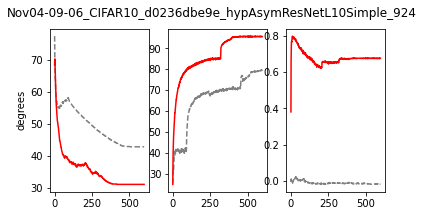

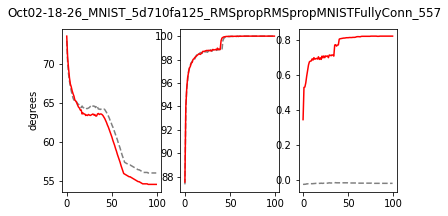

In [44]:
dict_depict = {'CIFAR10':'Nov04-09-06_CIFAR10_d0236dbe9e_hypAsymResNetL10Simple_924',
'MNIST':'Oct02-18-26_MNIST_5d710fa125_RMSpropRMSpropMNISTFullyConn_557'}

for dataset in dict_depict.keys():
    l = dict_depict[dataset]
    path_alignment_FA = os.path.join(path_resultsdir, l,'run_json_dict_FA.json')
    path_alignment_FFA = os.path.join(path_resultsdir, l,'run_json_dict_SLVanilla.json')
    if os.path.exists(path_alignment_FA) & os.path.exists(path_alignment_FFA):

        with open(path_alignment_FA,"r") as jfile:
            dj_FA = json.load(jfile)

        with open(path_alignment_FFA,"r") as jfile:
            dj_FFA = json.load(jfile)
    #         plt.subplots(2,1)
    #         plt.plot(dj_FA['Alignments_corrs_last_layer'])
    #         plt.plot(dj_FFA['Alignments_corrs_last_layer'])

        better_perf =  (dj_FFA['Train_acce'][-1]-dj_FA['Train_acce'][-1] >0)
        better_alignment = (dj_FFA['Alignments_corrs_last_layer'][-1]-dj_FA['Alignments_corrs_last_layer'][-1] >0)
        if better_perf and better_alignment:

            print(dj_FFA['Train_acce'][-1], l)
            fig, axes = plt.subplots(1,3, figsize=[6,3])


            axes[0].plot(180*np.arccos(np.array(dj_FA['Alignments_corrs_last_layer']))/np.pi, color='gray', ls='--',label='FA')
            axes[0].plot(180*np.arccos(np.array(dj_FFA['Alignments_corrs_last_layer']))/np.pi, color='r', ls='-',label='FFA')

            axes[0].set_ylabel('degrees')

            axes[1].plot(dj_FA['Train_acce'], color='gray', ls='--',label='FA')
            axes[1].plot(dj_FFA['Train_acce'], color='r', ls='-',label='FFA')

            axes[2].plot(dj_FA['Train_corrd'], color='gray', ls='--',label='FA')
            axes[2].plot(dj_FFA['Train_corrd'], color='r', ls='-',label='FFA')

            fig.suptitle(l)


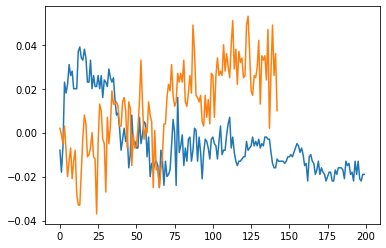

In [15]:
import os
import matplotlib.pyplot as plt

dict_depict = {'CIFAR10':'Nov04-09-06_CIFAR10_d0236dbe9e_hypAsymResNetL10Simple_924',
'MNIST':'Oct02-18-26_MNIST_5d710fa125_RMSpropRMSpropMNISTFullyConn_557'}
figsXvals = []
figsYvals = []
for dataset in dict_depict.keys():
    tempFigsX = []
    tempFigsY = []
    l = dict_depict[dataset]
    path_alignment_FA = os.path.join(l,'run_json_dict_FA.json')
    path_alignment_FFA = os.path.join(l,'run_json_dict_SLVanilla.json')
    if os.path.exists(path_alignment_FA) & os.path.exists(path_alignment_FFA):
        with open(path_alignment_FA,'r') as jfile:
            dj_FA = json.load(jfile)
        with open(path_alignment_FFA,'r') as jfile:
            dj_FFA = json.load(jfile)
    #         plt.subplots(2,1)
    #         plt.plot(dj_FA['Alignments_corrs_last_layer'])
    #         plt.plot(dj_FFA['Alignments_corrs_last_layer'])
        better_perf =  (dj_FFA['Train_acce'][-1]-dj_FA['Train_acce'][-1] >0)
        better_alignment = (dj_FFA['Alignments_corrs_last_layer'][-1]-dj_FA['Alignments_corrs_last_layer'][-1] >0)
        if better_perf and better_alignment:
            print(dj_FFA['Train_acce'][-1], l)
            fig, axes = plt.subplots(1,3, figsize=[6,3])
            axes[0].plot(180*np.arccos(np.array(dj_FA['Alignments_corrs_last_layer']))/np.pi, color='gray', ls='--',label='FA')
            axes[0].plot(180*np.arccos(np.array(dj_FFA['Alignments_corrs_last_layer']))/np.pi, color='r', ls='-',label='FFA')
            axes[0].set_ylabel('degrees')
            axes[1].plot(dj_FA['Train_acce'], color='gray', ls='--',label='FA')
            axes[1].plot(dj_FFA['Train_acce'], color='r', ls='-',label='FFA')
            axes[2].plot(dj_FA['Train_corrd'], color='gray', ls='--',label='FA')
            axes[2].plot(dj_FFA['Train_corrd'], color='r', ls='-',label='FFA')
            
            tempFigsX.append([180*np.arccos(np.array(dj_FA['Alignments_corrs_last_layer']))/np.pi,\
                             180*np.arccos(np.array(dj_FFA['Alignments_corrs_last_layer']))/np.pi])
            tempFigsX.append([dj_FA['Train_acce'],dj_FFA['Train_acce']])
            tempFigsX.append([dj_FA['Train_corrd'],dj_FFA['Train_corrd']])
            
            fig.suptitle(l)
            
    figsXvals.append(tempFigsX)

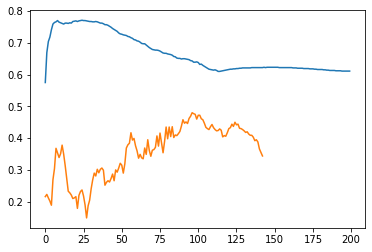

In [16]:
plt.plot(dj_FA['Alignments_corrs_last_layer'])
plt.plot(dj_FFA['Alignments_corrs_last_layer'])

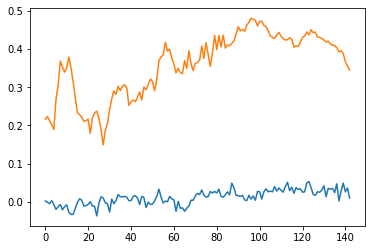

In [24]:
plt.plot(dj['Alignments_corrs_first_layer'])
plt.plot(dj['Alignments_corrs_last_layer'])

### Old code

number of valid runs discriminative 5
number of valid runs autoencoder 5
method SLVanilla 78.476
method BP 89.704
autoencoder acc BP 35.938
method FA 74.69
autoencoder acc FA 27.734
method SLVanilla 0.883
method BP 0.012
autoencoder corr BP 0.991
method FA 0.01
autoencoder corr FA 0.949
asymresnet18_893 PatienceF: 50.0 PatienceB: 40


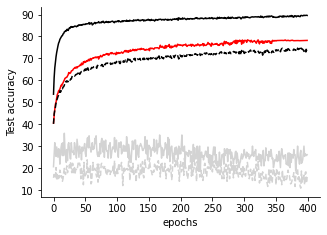

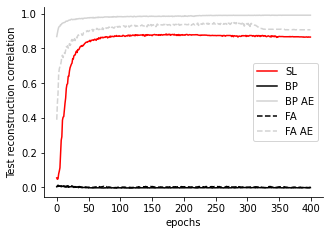

In [25]:

hashname= 'asymresnet18_893' 

#'hypsaymresnet18mtm' #'hypersearchsimplemodules'# 'hypersearchRMSpropNoBN'  # 'TwoCostAEcontrolMNIST'#'hypersearchRMSprop' #
#'RMSpRMSpMNISTAsymResLNet10BNaffine2' #'RMSpRMSpMNISTAsymResLNet10BNaffine2'


# 'MNISTAsymResLNet10BNaffPatience30'
#'RMSpRMSpMNISTAsymResLNet10BNaff3'

#'RMSpCIFAR10AsymResLNet10BNaff'


#'RMSpRMSpFaMNISTAsymResLNet10BNaff'  'RMSpRMSpFaMNISTAsymResLNet10BNaffPtnc30' #'FaMNISTAsymResLNet10BNaff' 


#'RMSpRMSpFaMNISTAsymResLNet10BNaffPtnc30' #'RMSpRMSpMNISTAsymResLNet10BNaff3' #'RMSpRMSpMNISTAsymResLNet10BNaffine'
#'RMSpRMSpFaMNISTAsymResLNet10BNaff' #'RMSpRMSpMNISTAsymResLNet10BNaff3' #'RMSpRMSpFaMNISTAsymResLNet10BNaff' # 'RMSpRMSpMNISTAsymResLNet10BNaffine' 


n_epochs = 400  #300#800#200#300#370
n_epochs_ae = 400  #300#500#200#300

#'RMSpropRMSpropMNISTAsymResLNet10' #'RMSpropRMSpropMNISTFullyConn' ##'RMSpropRMSpropMNISTFullyConnE150'
    # 'RMSpRMSpMNISTAsymResLNet10BNaffine'
    #'RMSpRMSpMNISTAsymResLNet10BNaffine'




test_acc_dict, test_corrd_dict, test_lossd_dict, configs, valid_runnames = get_measure_dicts_json(hashname, n_epochs, path_prefix, resultsdir)
test_acc_dict_ae, test_corrd_dict_ae, test_lossd_dict_ae, configs, valid_runnames_ae = get_measure_dicts_ae_json(hashname, n_epochs_ae, path_prefix, resultsdir)

arch =  configs['arche'][:-1]

methods = ['SLVanilla', 'BP','FA']
colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
method_labels = {'FA':'FA', 'BP':'BP', 'SLVanilla':'SL'}
linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-'}

# Test Acc
fig, ax = plt.subplots(1,1, figsize=(5,3.5))
for method in methods:
    # plot discriminative
    measure = test_acc_dict
    ax.plot(range(n_epochs ), np.median(measure[method], 0), colors[method], label=method_labels[method], ls=linestyles[method])
#     ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
#                     np.median(measure[method], 0)+measure[method].std(0),
#                     alpha=0.1, color=colors[method], ls=linestyles[method])
    print('method',method, max(np.median(measure[method],0)))
    
    if method in ['FA','BP']:
        # plot autoencoders
        measure = test_acc_dict_ae
        ax.plot(range(n_epochs_ae ), np.median(measure[method], 0), 'lightgray', label=method_labels[method] + ' AE', ls=linestyles[method])
#         ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
#                         np.median(measure[method], 0)+measure[method].std(0),
#                         alpha=0.1, color='gray', ls=linestyles[method])
        print('autoencoder acc',method, max(np.median(measure[method],0)))
        
    
ax = plt.gca()
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',direction='out', right=False)
plt.tick_params(axis='x',direction='out', top=False)
ax.set_xlabel('epochs')
ax.set_ylabel('Test accuracy')
# ax.legend(loc='center right')

# ax.set_title('%s %s (%s)'%(configs['dataset'], arch, hashname))

savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)

# fig.savefig(savedir + '5lineplots_Testacc_%s.png'%(hashname), dpi=200)
# fig.savefig(savedir + '5lineplots_Testacc_%s.pdf'%(hashname), dpi=200)


# ax.set_title('Convolutional architecture on %s'%configs['dataset'])


savedir = path_prefix + '/Results/Symbio/runswithhash/Final/'
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
# fig.savefig(savedir + '5lineplots_Testacc_%s.png'%(hashname), dpi=200)
# fig.savefig(savedir + '5lineplots_Testacc_%s.pdf'%(hashname), dpi=200)
#-------------------------------------------------------------------------------

# Test correlation
fig, ax = plt.subplots(1,1, figsize=(5,3.5))
for method in methods:
    # plot discriminative
    measure = test_corrd_dict
    ax.plot(range(n_epochs ), np.median(measure[method], 0), colors[method], label=method_labels[method], ls=linestyles[method])
#     ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
#                     np.median(measure[method], 0)+measure[method].std(0),
#                     alpha=0.1, color=colors[method], ls=linestyles[method])
    print('method',method, max(np.median(measure[method],0)))
    
    if method in ['FA','BP']:
        # plot autoencoders
        measure = test_corrd_dict_ae
        ax.plot(range(n_epochs_ae ), np.median(measure[method], 0), 'lightgray', label=method_labels[method] + ' AE', ls=linestyles[method])
#         ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
#                         np.median(measure[method], 0)+measure[method].std(0),
#                         alpha=0.1, color='gray', ls=linestyles[method])
        print('autoencoder corr',method, max(np.median(measure[method],0)))
        
    
ax = plt.gca()
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',direction='out', right=False)
plt.tick_params(axis='x',direction='out', top=False)
ax.set_xlabel('epochs')
ax.set_ylabel('Test reconstruction correlation')
ax.legend(loc='center right')

# ax.set_title('%s %s (%s)'%(configs['dataset'], arch, hashname))
# plt.tight_layout()

savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.png'%(hashname), dpi=200)
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.pdf'%(hashname), dpi=200)


# ax.set_title('Convolutional architecture on %s'%configs['dataset'])



savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.png'%(hashname), dpi=200)
# fig.savefig(savedir + '5lineplots_Testcorrd_%s.pdf'%(hashname), dpi=200)
print(hashname, 'PatienceF:',configs['patiencee'],'PatienceB:',configs['patienced'])

### scatter plot  (for MNIST and CIFAR10)

number of valid runs discriminative 5
number of valid runs autoencoder 5
customized
AsymResNetL10Simple
number of valid runs discriminative 5
number of valid runs autoencoder 5
resnet18
asymresnet18_893


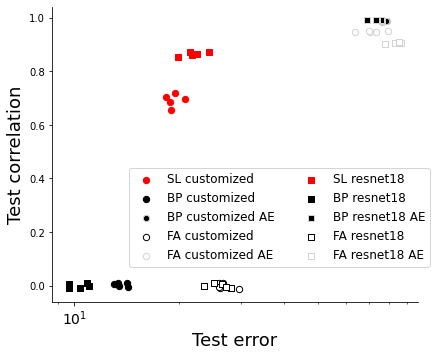

In [27]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

markers = {'customized':'o', 'resnet18':'s'}

hash_1 = 'AsymResNetL10Simple'
hash_2  = 'asymresnet18_893'



fig, ax = plt.subplots(1,1, figsize=(6,5))

for arch_type in ['customized', 'resnet18']:
    colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
    facecolors = {'FA':'white', 'BP':'k', 'SLVanilla':'red'}
    linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-'}

    methods = ['SLVanilla', 'BP','FA']
    method_labels = {'FA':'FA', 'BP':'BP', 'SLVanilla':'SL'}
    #'RMSpropRMSpropMNISTAsymResLNet10' #'RMSpropRMSpropMNISTFullyConn' ##'RMSpropRMSpropMNISTFullyConnE150'
        # 'RMSpRMSpMNISTAsymResLNet10BNaffine'
    if arch_type =='customized':
        hash_arch_type = hash_1
        n_epochs, n_epochs_ae = 400, 400
        arch_label = 'customized'
    elif arch_type == 'resnet18':
        hash_arch_type = hash_2 
        n_epochs, n_epochs_ae = 400, 400
        arch_label = 'resnet18'
    test_acc_dict, test_corrd_dict, test_lossd_dict, configs, _ = get_measure_dicts_json(hash_arch_type, n_epochs, path_prefix, resultsdir)
    test_acc_dict_ae, test_corrd_dict_ae, test_lossd_dict_ae, _, _ = get_measure_dicts_ae_json(hash_arch_type, n_epochs_ae, path_prefix, resultsdir)


#     fig, ax = plt.subplots(1,1, figsize=(5,5))

    for method in methods:
               
        x = 100-test_acc_dict[method][:,-1] #.max(1)#
        y = test_corrd_dict[method][:,-1] #.max(1)
        ax.scatter(x, y, s=40, edgecolor=colors[method],facecolor=facecolors[method],
                   marker=markers[arch_type], label='%s %s'%(method_labels[method],arch_label))
#         confidence_ellipse(x, y, ax, edgecolor=colors[method], ls=linestyles[method])


        if method !='SLVanilla':


            y = test_corrd_dict_ae[method][:,-1] #.max(1)#
            x = 100-test_acc_dict_ae[method][:,-1]#.max(1)

            ax.scatter(x, y, s=40, edgecolor='lightgray', facecolor=facecolors[method],
                       marker=markers[arch_type], label='%s %s'%(method_labels[method],arch_label) + ' AE')
#             confidence_ellipse(x, y, ax, edgecolor='lightgray', ls=linestyles[method])




    ax = plt.gca()
    ax.patch.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tick_params(axis='y',direction='out', right=False)
    plt.tick_params(axis='x',direction='out', top=False)
    ax.set_xlabel('Test error', fontsize=18)
    ax.set_ylabel('Test correlation', fontsize=18)
#     ax.set_title('%s %s'%(arch_type, configs['dataset']))
    plt.tight_layout()


    plt.xscale('log')
#     plt.yscale('log')
#     plt.grid(True, which="both", ls="-", color='lightblue')
    # plt.gca().invert_xaxis()

    
    print(arch_type)
    print(hash_arch_type)

ax.legend(loc='lower right',bbox_to_anchor=(1.05, 0.1),ncol=2,fontsize=12 )#labelspacing=0.05
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)


savedir = path_prefix + '/Results/Symbio/summary/'
if not os.path.exists(savedir):
    os.makedirs(savedir)
# fig.savefig(savedir + 'cloudscatter_wAE_both_%s_%s.png'%(hash_1, hash_2), dpi=200)
# fig.savefig(savedir + 'cloudscatter_wAE_both_%s_%s.pdf'%(hash_1, hash_2), dpi=200)



# Figure 3 (Robust evaluations)

In [ ]:
## examples (MNIST) are saved in Results/Symbio/Symbio/Feb12-10-24_MNIST_a3e0466f41_609

### adversarial robustness

In [ ]:
method = 'FA' #'BP'#'FA' #'SLVanilla'
facecolors = {'FA':'white', 'SLVanilla':'red', 'BP':'k'}

epsilons = np.unique(master_df['epsilon'])



for iteration in range(4):
    fig, ax = plt.subplots(1,1)
    for method in ['SLVanilla','BP','FA']:
    
        
        itr_means, itr_sems = [], []
        for j, eps in enumerate(epsilons):
            mehtod_selection = master_df['method']==method
            epsilon_selection = master_df['epsilon']==eps
            sigma2_selection = (master_df['sigma2']-0.0)<0.01
            itr = master_df[(mehtod_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
            itr_means.append(itr.mean())
            itr_sems.append(ss.sem(itr))
            
        ax.errorbar(epsilons,itr_means, itr_sems, label=method_labels[method], color=colors[method], ls=linestyles[method])

#         if measure_name == 'accuracy':
#             ax.set_ylim([0,100])
#         else:
#             ax.set_ylim([0,0.9])

        ax = plt.gca()
        ax.patch.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tick_params(axis='y',direction='out', right=False)
        plt.tick_params(axis='x',direction='out', top=False)

        ax.set_xlabel('epsilon')
        ax.set_ylabel('Test %s'%measure_name)
#         if measure_name == 'accuracy':
#             ax.text(1.1, 1, hashname, fontsize=8, rotation=90)
        ax.set_title('Adversarial attack robustness: iteration %d'%(iteration)) #: iteration %d'%(iteration)
        ax.legend()
        plt.tight_layout()

    savedir = path_prefix + '/Results/Symbio/runswithhash/%s/evaluate/'%hashname
#     savedir = path_prefix + '/Results/Symbio/Symbio/%s/'%runname
    
    if not os.path.exists(savedir):
        os.makedirs(savedir)
    fig.savefig(savedir + 'advattack_itr%d_%s.png'%(iteration, measure_name), dpi=200)
    fig.savefig(savedir + 'advattack_itr%d_%s.pdf'%(iteration, measure_name), dpi=200)
    
print(hashname, measure_name)

### noise robustness for recurrence

In [ ]:
import scipy.stats as ss
 #'BP'#'FA' #'SLVanilla'
facecolors = {'FA':'white', 'SLVanilla':'red', 'BP':'k'}
colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
colors_dd = {'FA':'y', 'BP':'g', }
sigmas = np.unique(master_df['sigma2'])
_, bins = np.histogram(sigmas,5)
sigmas = np.floor(bins*10)/10

for s in sigmas:


    fig, ax = plt.subplots(1,1)
    for method in ['SLVanilla','BP','FA']:


        itr_means, itr_sems = [], []
        for iteration in range(4):
            mehtod_selection = master_df['method']==method
            epsilon_selection = master_df['epsilon']==0.0
            sigma2_selection = (master_df['sigma2']-s)<0.01
            itr = master_df[(mehtod_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
    #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
    #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
            itr_means.append(itr.mean())
            itr_sems.append(ss.sem(itr))
        ax.errorbar(range(4),itr_means, itr_sems, label=method_labels[method], color=colors[method], ls=linestyles[method])
        
        #-----autoencoders
        if method in ['FA','BP']:
            itr_means, itr_sems = [], []
            for iteration in range(4):
                method_selection = master_df_autoencoder['method']==method
                epsilon_selection = master_df_autoencoder['epsilon']==0.0
                sigma2_selection = (master_df_autoencoder['sigma2']-s)<0.01
                itr = master_df_autoencoder[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
        #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
        #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
                itr_means.append(itr.mean())
                itr_sems.append(ss.sem(itr))
            ax.errorbar(range(4),itr_means, itr_sems, label=method_labels[method]+' AE', color=colors_ae[method], ls=linestyles[method])

        
        #-----autoencoders two costs
        if method in ['FA','BP']:
            itr_means, itr_sems = [], []
            for iteration in range(4):
                method_selection = master_df_autoencodertwocosts['method']==method
                epsilon_selection = master_df_autoencodertwocosts['epsilon']==0.0
                sigma2_selection = (master_df_autoencodertwocosts['sigma2']-s)<0.01
                itr = master_df_autoencodertwocosts[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
        #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
        #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
                itr_means.append(itr.mean())
                itr_sems.append(ss.sem(itr))
            ax.errorbar(range(4),itr_means, itr_sems, label=method_labels[method]+' twocosts AE', color=colors_tcae[method], ls=linestyles[method])

        
        
        
        
#          #-----dynamic decoders
#         if method in ['FA','BP']:
#             itr_means, itr_sems = [], []
#             for iteration in range(4):
#                 method_selection = master_df_dynamic['method']==method
#                 epsilon_selection = master_df_dynamic['epsilon']==0.0
#                 sigma2_selection = (master_df_dynamic['sigma2']-s)<0.01
#                 itr = master_df_dynamic[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
#         #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
#         #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
#                 itr_means.append(itr.mean())
#                 itr_sems.append(ss.sem(itr))
#             ax.errorbar(range(4),itr_means, itr_sems, label=method_labels[method]+' Dd', color=colors_dd[method], ls=linestyles[method])

        
        
#         if measure_name == 'accuracy':
#             ax.set_ylim([70,100])
#         else:
#             ax.set_ylim([-0.1,0.8])

        ax = plt.gca()
        ax.patch.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tick_params(axis='y',direction='out', right=False)
        plt.tick_params(axis='x',direction='out', top=False)
        ax.set_xticks(range(4))
    #     ax.set_xticklabels(range(4))
        ax.set_xlabel('iteration')
        ax.set_ylabel('Test %s'%measure_name)
    #     if measure_name == 'accuracy':
    #         ax.text(1.1, 1, hashname, fontsize=8, rotation=90)

        ax.set_title('noise robustness sigma2=%0.2f'%(s))
        ax.legend(fontsize=12)
        plt.tight_layout()

    savedir = path_prefix + '/Results/Symbio/runswithhash/%s/evaluate/'%hashname
#     savedir = path_prefix + '/Results/Symbio/Symbio/%s/'%runname
    if not os.path.exists(savedir):
        os.makedirs(savedir)
    fig.savefig(savedir + 'noise_sigma2_wAE_%s_%s.png'%(s, measure_name), dpi=200)
    fig.savefig(savedir + 'noise_sigma2_wAE_%s_%s.pdf'%(s, measure_name), dpi=200)
print(hashname, measure_name, 'OR')
print(runname, measure_name)

# Figure 4 (Inference , inv) alongside the accuracy after repair

### Denosing

### hallucination 

In [ ]:
dict_halluc = np.load('/home/tt2684/Research/Results/FFA_Symbio2023/hallucination/dict_sample_halluc_zerolike3.npy')
# dict_halluc = {'kwargs':kwargs_halluc, 'sample':sample, 'interms':interm_Ys}


### imagery

### Occlusions

# Figure 5 (Novelty detection)